# **Project-3**

***Project Title:*** Customer Segmentation

***Project Description:*** In this project, you will build a machine learning model to segment customers based on their demographics and spending behavior. The data set includes information on customers' age, gender, annual income, and spending score (a metric assigned by the mall based on how much customers spend and how often they visit).

***Dataset Details:*** The data set contains 200 records of customers.

***Datasets Location:*** Canvas -> Modules -> Week 14 -> Datasets -> **"customers.csv"**.

***Tasks:*** 

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several unsupervised clustering models on the preprocessed data set, including k-means clustering and DBSCAN.

3) *Model Evaluation:* You will evaluate the clustering results using silhouette score. You will also analyze the resulting customer segments and interpret their characteristics.

4) *Deployment:* Once you have identified the customer segments, you can use them to personalize marketing campaigns, improve customer retention, and optimize product recommendations.

This project will give you hands-on experience with unsupervised clustering, data preprocessing, and model evaluation. It also has real-world applications in marketing and e-commerce, where customer segmentation can help businesses tailor their offerings to different customer groups.


In [1]:
# Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv("drive/My Drive/Machine Learning/Project 3/customers.csv")
df = data.drop(['CustomerID', 'Gender'], axis=1)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [2]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [4]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Age and Spending Score

In [5]:
X = df
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [6]:
# Age and spending Score
X_normalized = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42) )
    algorithm.fit(X_normalized)
    inertia.append(algorithm.inertia_)

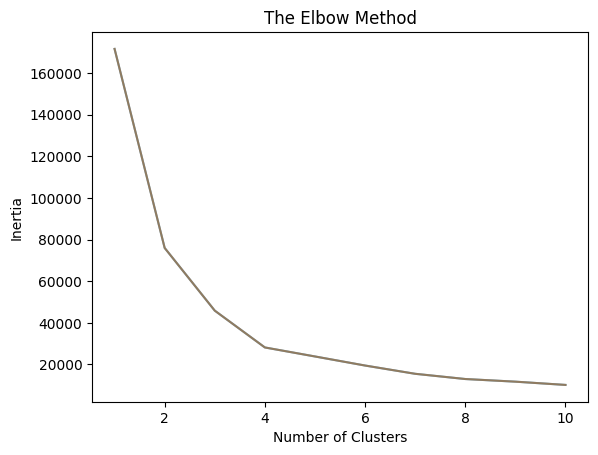

In [7]:
plt.plot(np.arange(1 , 11) , inertia)
plt.plot(np.arange(1 , 11) , inertia, alpha = 0.5)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [8]:
# Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(X_normalized)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


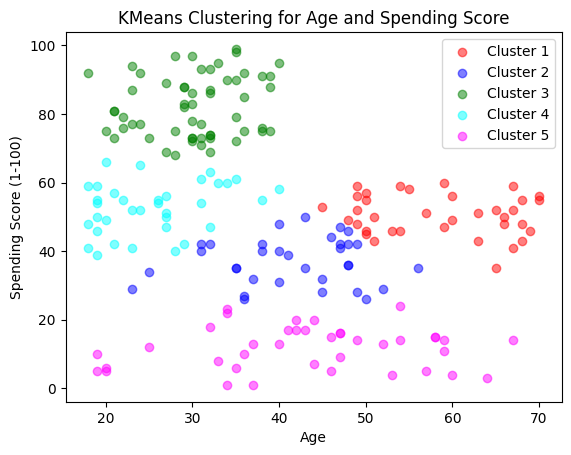

In [9]:
# Fit KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_normalized)

# Visualize clusters

colors = ['red', 'blue', 'green', 'cyan', 'magenta']

n_clusters = 5
for i in range(n_clusters):
    plt.scatter(X_normalized[labels == i, 0], X_normalized[labels == i, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')
plt.title('KMeans Clustering for Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Silhouette Score for kmeans

In [10]:
# Calculate Silhouette Score Kmeans
kmeansage_silhouette_avg = silhouette_score(X_normalized, y_kmeans)
print("The average silhouette score is :", kmeansage_silhouette_avg)

The average silhouette score is : 0.43350225495428363


Guassian Mixture

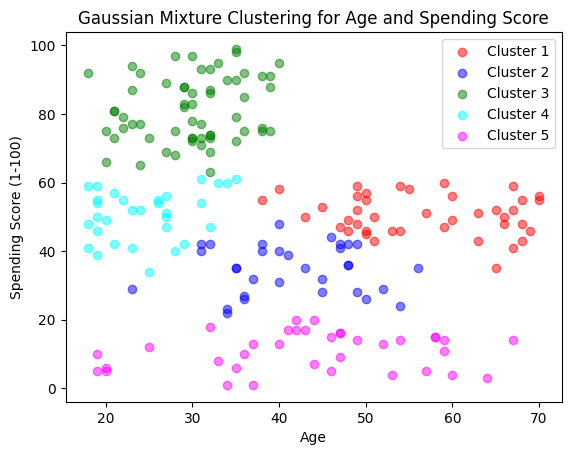

In [11]:
# Fit Gaussian Mixture model
n_components = 5 # number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(X_normalized)

# Visualize clusters
for i in range(n_components):
    plt.scatter(X_normalized[labels == i, 0], X_normalized[labels == i, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')
plt.title('Gaussian Mixture Clustering for Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Silhouette Score Guassian

In [12]:
# Calculate Silhouette Score Guassian
gmmage_silhouette_avg = silhouette_score(X_normalized, labels)
print("The average silhouette score is :", gmmage_silhouette_avg)

The average silhouette score is : 0.4306759789731364


DBSCAN

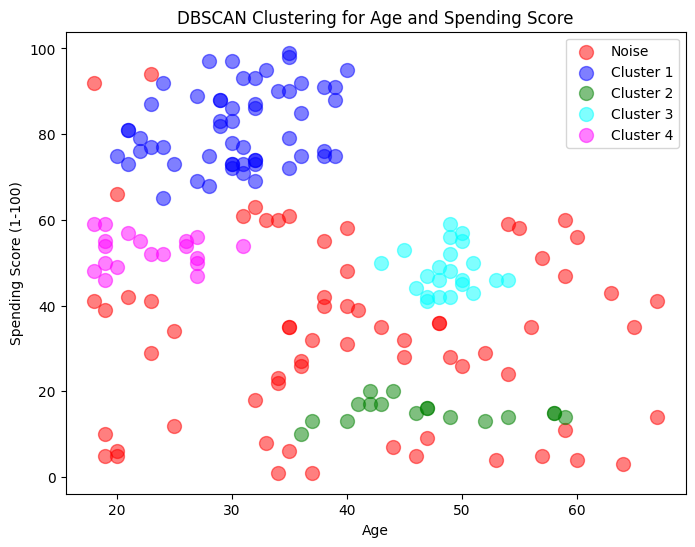

In [13]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=5, min_samples=6)
dbscan.fit(X_normalized)

# Extract the labels
labels = dbscan.labels_


# Plot the clusters
plt.figure(figsize=(8, 6))
for label, color in zip(range(min(labels), max(labels)+1), colors):
    if label == -1:
        # Plot noise 
        plt.scatter(X_normalized[labels == label, 0], X_normalized[labels == label, 1], color=color, s=100, alpha=0.5, label='Noise')
    else:
        # Plot clusters 
        plt.scatter(X_normalized[labels == label, 0], X_normalized[labels == label, 1], color=color, s=100, alpha=0.5, label=f'Cluster {label+1}')
plt.title('DBSCAN Clustering for Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [14]:
# Calculate Silhouette Score for DBSCAN
dbage_silhouette_avg = silhouette_score(X_normalized, labels)
print("The average silhouette score is :", dbage_silhouette_avg)

The average silhouette score is : 0.19686977554902063


Income and Spending Score

In [15]:
X2 = df
scaler = MinMaxScaler()
X2_normalized = scaler.fit_transform(X2)

In [16]:
#Annual Income and spending Score
X2_normalized = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    algorithm.fit(X2_normalized)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


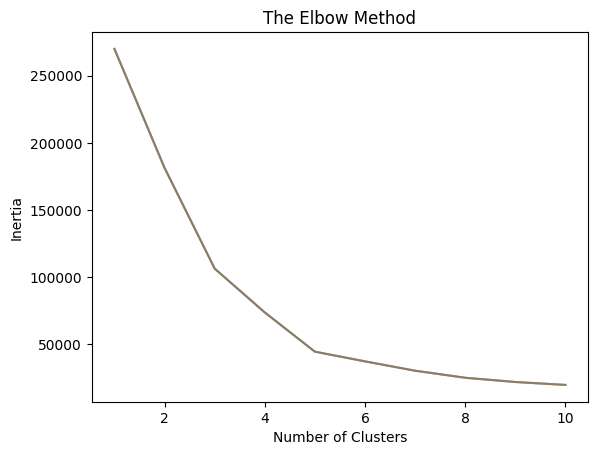

In [17]:
plt.plot(np.arange(1 , 11) , inertia)
plt.plot(np.arange(1 , 11) , inertia, alpha = 0.5)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [18]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', random_state= 42) )
algorithm.fit(X2_normalized)
labels2 = algorithm.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


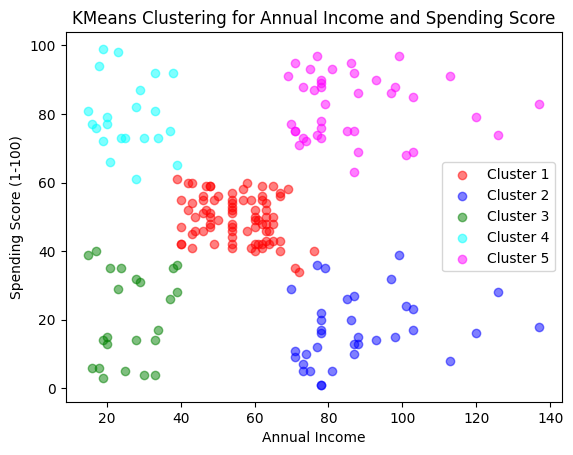

In [19]:
# Fit KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X2_normalized)

# Define colors 
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
n_clusters = 5
# Visualize clusters
for i in range(n_clusters):
    plt.scatter(X2_normalized[labels == i, 0], X2_normalized[labels == i, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')
plt.title('KMeans Clustering for Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


 Silhouette Score for Kmeans

In [20]:
# Calculate Silhouette Score for Kmeans
kmeansincome_silhouette_avg = silhouette_score(X2_normalized, y_kmeans)
print("The average silhouette score is :", kmeansincome_silhouette_avg)

The average silhouette score is : 0.0359861988370674


Guassian Mixture

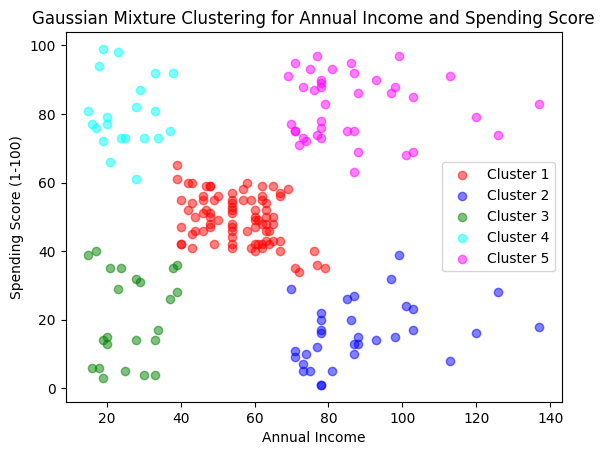

In [21]:
# Fit Gaussian Mixture model
n_components = 5 # number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(X2_normalized)

# Visualize clusters
for i in range(n_components):
    plt.scatter(X2_normalized[labels == i, 0], X2_normalized[labels == i, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')
plt.title('Gaussian Mixture Clustering for Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
# Compute Silhouette Score
gmmincome_silhouette_avg = silhouette_score(X2_normalized, labels)

# Print Silhouette Score
print("The average silhouette score is :", gmmincome_silhouette_avg)

The average silhouette score is : 0.5528243704895652


DBSCAN

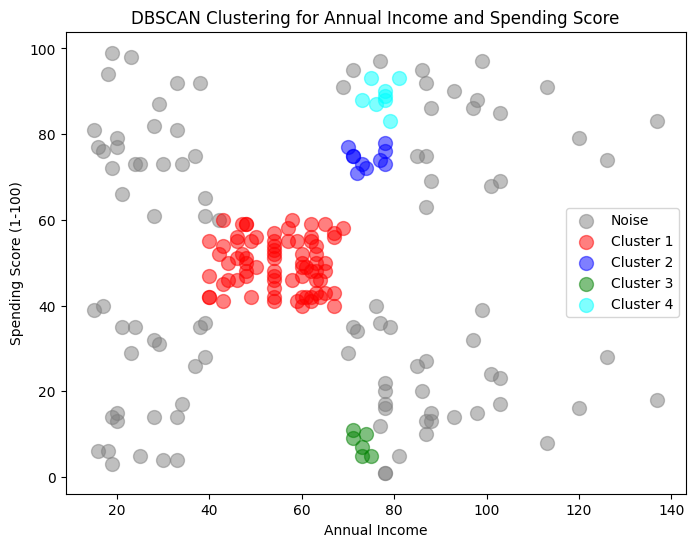

In [23]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=5, min_samples=6)
dbscan.fit(X2_normalized)

# Extract the labels
labels = dbscan.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in range(min(labels), max(labels)+1):
    if label == -1:
        # Plot noise 
        plt.scatter(X2_normalized[labels == label, 0], X2_normalized[labels == label, 1], color='grey', s=100, alpha=0.5, label='Noise')
    else:
        # Plot clusters 
        plt.scatter(X2_normalized[labels == label, 0], X2_normalized[labels == label, 1], color=colors[label], s=100, alpha=0.5, label=f'Cluster {label+1}')
plt.title('DBSCAN Clustering for Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [24]:
# Compute the Silhouette Score
dbincome_silhouette_avg = silhouette_score(X2_normalized, labels)
# Print the Silhouette Score
print("The average silhouette score is :", dbincome_silhouette_avg)

The average silhouette score is : 0.06353533083993718


Silhouette Scores

In [25]:
print("The average silhouette score for Kmeans (Age and Spending Score) is :", kmeansage_silhouette_avg)
print("The average silhouette score for Guassian (Age and Spending Score) is :", gmmage_silhouette_avg)
print("The average silhouette score for DBSCAN (Age and Spending Score) is :", dbage_silhouette_avg)

print("\nThe average silhouette score for Kmeans (Annual Income and Spending Score) is :", kmeansincome_silhouette_avg)
print("The average silhouette score for Guassian (Annual Income and Spending Score) is :", gmmincome_silhouette_avg)
print("The average silhouette score for DBSCAN (Annual Income and Spending Score) is :",dbincome_silhouette_avg)


The average silhouette score for Kmeans (Age and Spending Score) is : 0.43350225495428363
The average silhouette score for Guassian (Age and Spending Score) is : 0.4306759789731364
The average silhouette score for DBSCAN (Age and Spending Score) is : 0.19686977554902063

The average silhouette score for Kmeans (Annual Income and Spending Score) is : 0.0359861988370674
The average silhouette score for Guassian (Annual Income and Spending Score) is : 0.5528243704895652
The average silhouette score for DBSCAN (Annual Income and Spending Score) is : 0.06353533083993718


Kmeans clustering performed best for Age and Spending Score, with a silhouette score of 0.4335, followed  by Gaussian mixture model with a score of 0.4307. DBSCAN had a lower score of 0.1969.

For Annual Income and Spending Score, Guassian has the highest silhouette score of 0.552 while DBSCAN has 0.0635 followed by Kmeans with 0.035.